In [1]:
import pandas as pd
import tensorflow as tf

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)
model_results = {}

In [2]:
df = pd.read_csv(Path('..', 'data', 'alzheimers_disease_data.csv'))

In [3]:
# Drop unnecessary columns:
# PatientID:        unique identifier for each record
# DoctorInCharge:   confidential data
df.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)

# Model 1 - All Features

In [4]:
# Split preprocessed data into features and target arrays
X = df.drop(columns='Diagnosis')
y = df['Diagnosis']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Determine the number of input neurons
print(f'Input neurons: {len(X_train_scaled[0])}')

Input neurons: 32


In [5]:
# Define the model
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Input(shape=(32,)))
nn.add(tf.keras.layers.Dense(units=2, activation='tanh'))
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69 (276.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall'])

results = []
epochs_trained = 0

for i in range(30):
    # Train the model
    trained_model = nn.fit(
        X_train_scaled, 
        y_train, 
        epochs=5,
        verbose=0
    )

    epochs_trained += len(trained_model.epoch)

    # Evaluate the model using the test data
    metrics = nn.evaluate(X_test_scaled, y_test, verbose=0)
    results.append({
        'Epochs Trained' : epochs_trained,
        'Loss' : metrics[0],
        'Accuracy' : metrics[1],
        'Precision' : metrics[2],
        'Recall' : metrics[3]
    })

results_df = pd.DataFrame(results)
results_df.set_index('Epochs Trained', inplace=True)
results_df.sort_values('Accuracy', ascending=False, inplace=True)
model_results['All Features'] = results_df

# Model 2 - RFE Columns

In [7]:
# Most useful colums from rfe_analysis
df2 = df[['FunctionalAssessment', 'MemoryComplaints', 'ADL', 'Diagnosis']]

In [8]:
# Split preprocessed data into features and target arrays
X = df2.drop(columns='Diagnosis')
y = df2['Diagnosis']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Determine the number of input neurons
print(f'Input neurons: {len(X_train_scaled[0])}')

Input neurons: 3


In [9]:
# Define the model
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Input(shape=(3,)))
nn.add(tf.keras.layers.Dense(units=5, activation='tanh'))
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 5)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26 (104.00 B)

 Trainable params: 26 (104.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall'])

results = []
epochs_trained = 0

for i in range(60):
    # Train the model
    trained_model = nn.fit(
        X_train_scaled, 
        y_train, 
        epochs=5,
        verbose=0
    )

    epochs_trained += len(trained_model.epoch)

    # Evaluate the model using the test data
    metrics = nn.evaluate(X_test_scaled, y_test, verbose=0)
    results.append({
        'Epochs Trained' : epochs_trained,
        'Loss' : metrics[0],
        'Accuracy' : metrics[1],
        'Precision' : metrics[2],
        'Recall' : metrics[3]
    })

results_df = pd.DataFrame(results)
results_df.set_index('Epochs Trained', inplace=True)
results_df.sort_values('Accuracy', ascending=False, inplace=True)
model_results['RFE Columns'] = results_df

# Model 3 - Non-RFE Columns

In [11]:
# Drop the most useful colums from rfe_analysis
df3 = df.drop(columns=['FunctionalAssessment', 'MemoryComplaints', 'ADL'])

In [12]:
# Split preprocessed data into features and target arrays
X = df3.drop(columns='Diagnosis')
y = df3['Diagnosis']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Determine the number of input neurons
print(f'Input neurons: {len(X_train_scaled[0])}')

Input neurons: 29


In [13]:
# Define the model
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Input(shape=(29,)))
nn.add(tf.keras.layers.Dense(units=2, activation='tanh'))
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63 (252.00 B)

 Trainable params: 63 (252.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall'])

results = []
epochs_trained = 0

for i in range(20):
    # Train the model
    trained_model = nn.fit(
        X_train_scaled, 
        y_train, 
        epochs=5,
        verbose=0
    )

    epochs_trained += len(trained_model.epoch)

    # Evaluate the model using the test data
    metrics = nn.evaluate(X_test_scaled, y_test, verbose=0)
    results.append({
        'Epochs Trained' : epochs_trained,
        'Loss' : metrics[0],
        'Accuracy' : metrics[1],
        'Precision' : metrics[2],
        'Recall' : metrics[3]
    })

results_df = pd.DataFrame(results)
results_df.set_index('Epochs Trained', inplace=True)
results_df.sort_values('Accuracy', ascending=False, inplace=True)
model_results['Non-RFE Columns'] = results_df

# Compare Model Results

In [15]:
def print_model_results(model_results):
    print('Minimum loss:      {} at epoch {}'.format(round(model_results['Loss'].min(), 4), model_results['Loss'].idxmin()))
    print('Maximum accuracy:  {} at epoch {}'.format(round(model_results['Accuracy'].max(), 4), model_results['Accuracy'].idxmax()))
    print('Maximum precision: {} at epoch {}'.format(round(model_results['Precision'].max(), 4), model_results['Precision'].idxmax()))
    print('Maximum recall:    {} at epoch {}'.format(round(model_results['Recall'].max(), 4), model_results['Recall'].idxmax()))

All Features
Minimum loss:      0.3834 at epoch 40
Maximum accuracy:  0.842 at epoch 30
Maximum precision: 0.8081 at epoch 25
Maximum recall:    0.7448 at epoch 40

RFE Columns
Minimum loss:      0.422 at epoch 175
Maximum accuracy:  0.8364 at epoch 180
Maximum precision: 0.7727 at epoch 65
Maximum recall:    0.7672 at epoch 180

Non-RFE Columns
Minimum loss:      0.6035 at epoch 40
Maximum accuracy:  0.7026 at epoch 60
Maximum precision: 0.6882 at epoch 60
Maximum recall:    0.3282 at epoch 60



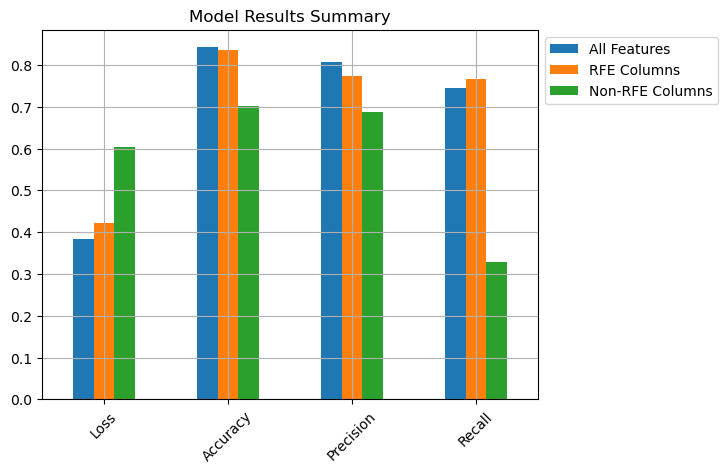

In [16]:
results_summary = []

for name, results in model_results.items():
    print(name)
    print_model_results(results)
    print()

    results_summary.append({
        'Model' : name,
        'Loss' : results['Loss'].min(),
        'Accuracy' : results['Accuracy'].max(),
        'Precision' : results['Precision'].max(),
        'Recall' : results['Recall'].max()
    })

summary_df = pd.DataFrame(results_summary)
summary_df.set_index('Model', inplace=True)
summary_df.transpose().plot(kind='bar', title='Model Results Summary', rot=45, grid=True).legend(bbox_to_anchor=(1, 1))